# Загрузка данных и библиотек

Загрузка датасетов:

In [500]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 46.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 89.7MB/s]


Загрузка библиотек:

In [501]:
!pip install catboost

In [502]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

Загрузка тренировочной части датасета в DataFrame

In [562]:
data = pd.read_csv("./game_of_thrones_train.csv", index_col="S.No")

# Предобработка столбцов

## Просмотр столбцов на наличие пропусков и удаление бесполезных (по своему смыслу или количеству пропусков) столбцов

Просмотр столбцов на наличие пропусков

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

Предварительные выводы по столбцам:

**name**: данный столбец, по моему мнению, не представляет ценности, так как имя персонажа вряд ли играет роль в том, выживет он или нет, кроме того количество уникальных значений в данном столбце тоже не помогает.

**title**: данный столбец может представлять интерес, однако с ним есть одна проблема - количество уникальных значений (очень большое), чтобы данный столбец использовать нужно как-то упразднить, сократить количество уникальных значений. Если это не делать, то, кажется, его лучше удалить.

**house**: ситуация с этим столбцом аналогична ситуации с столбцом title, нужно попытать сократить количество уникальных значений, в противном случае удалить этот столбец.

**culture**: у данного столбца будет сокращено количество уникальных значений, как рекомендуется в подсказке.

**book1/2/3/4/5**: очевидно, эти столбцы играют большую роль, стоит в будущем выбрать наиболее влиятельные из них (то есть, которые хорошо коррелируют с целевой переменной и оставить их, оставшиеся удалить).

**isNoble**: судя по всему это обработанный столбец title, скорее всего, стоит удалить столбец title и использовать данный столбец вместо него.

**Age**: прежде чем выносить решение по данному столбцу необходимо сначала посмотреть на его корреляцию с целевым признаком. Возможно потребуется сократить количество уникальных значений путём группировки.

**male**: прежде чем выносить решение по данному столбцу необходимо сначала посмотреть на его корреляцию с целевым признаком.

**dateOfBirth**: можно конечно посмотреть на корреляцию этого признака с целевым признаком, но, как мне кажется, данный признак ценности не представляет, кроме того, в нём огромное количество пропусков, так что стоит удалить этот столбец.

**spouse**: нужно переделать этот столбец, ставить 1, если у персонажа есть супруг/супруга, в противном случае 0.

**father**: стоит посмотреть на корреляцию данного столбца с целевым признаком, но перед этим его нужно преобразовать также как и столбец spouse.

**mother**: стоит посмотреть на корреляцию данного столбца с целевым признаком, но перед этим его нужно преобразовать также как и столбец spouse.

**heir**: стоит посмотреть на корреляцию данного столбца с целевым признаком, но перед этим его нужно преобразовать также как и столбец spouse.

**isMarried**: стоит сначала посмотреть на корреляцию данного признака с целевым.

**isAliveSpouse**: в данном столбце слишком много пропусков и он слишком специфичен, чтобы его оставлять.

**isAliveFather**: в данном столбце слишком много пропусков и он слишком специфичен, чтобы его оставлять.

**isAliveMother**: в данном столбце слишком много пропусков и он слишком специфичен, чтобы его оставлять.

**isAliveHeir**: в данном столбце слишком много пропусков и он слишком специфичен, чтобы его оставлять.

**isAliveFather**: в данном столбце слишком много пропусков и он слишком специфичен, чтобы его оставлять.

**numDeadRelations**: прежде, чем что-то говорить об этом столбце стоит посмотреть на его корреляцию с целевым признаком + преобразуем столбец так, как описанов задании.

**popularity**: прежде, чем что-то говорить об этом столбце стоит посмотреть на его корреляцию с целевым признаком + преобразуем столбец так, как описанов задание.

Удаление предварительно "забракованных" столбцов:

In [505]:
data.drop(columns=["name", "dateOfBirth", "isAliveSpouse", "isAliveFather", "isAliveMother", "isAliveHeir", "isAliveFather", "title"], inplace=True)

Первоначальны беглый осмотр произведён, теперь нужно провести кодировку столбцов, а после этого смотреть корреляцию характеристик с целевым признаком, после чего можно будет провести удаление ненужных столбцов и начинать обучение моделей.

## Преобразование столбцов

### Обработка столбца culture

Проведём сокращение уникальных значений в данном столбце, как описано в подсказке:

In [506]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [507]:
def simplification_of_culture(cell: str, cult: dict) -> str:
    if not(pd.isna(cell)) and type(cell) == str:
        cell = cell.lower()

        for key in cult:
            for value in cult[key]:
                if cell == value:
                    return key

        return cell
    else:
        return "unknown"

In [508]:
data["culture"] = data["culture"].apply(lambda x: simplification_of_culture(x, cult))

Теперь, когда количество уникальных значений сокращено, то нужно декодировать строковые значения (преобразовать строки к числам). Воспользуемся labelEncoderом:

In [509]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

In [510]:
data["culture"] = label_encoding.fit_transform(data["culture"])

Обработка столбца завершена.

### Обработка столбца mother

Данный столбец декодируем следующим путём, если у ячейки есть значение, то поставим 1, в противном случае поставим 0. Таким образом, данный столбец будет отображить известно ли у персоонажа имя матери или нет.

In [511]:
data["mother"] = data["mother"].apply(lambda x: 1 if type(x) == str else 0)

Обработка столбца завершена.

### Обработка столбца father

Данный столбец декодируем следующим путём, если у ячейки есть значение, то поставим 1, в противном случае поставим 0. Таким образом, данный столбец будет отображить известно ли у персоонажа имя отца или нет.

In [512]:
data["father"] = data["father"].apply(lambda x: 1 if type(x) == str else 0)

Обработка столбца завершена.

### Обработка столбца heir

Данный столбец декодируем следующим путём, если у ячейки есть значение, то поставим 1, в противном случае поставим 0. Таким образом, данный столбец будет отображить есть ли у персоонажа наследник или нет.

In [513]:
data["heir"] = data["heir"].apply(lambda x: 1 if type(x) == str else 0)

Обработка столбца завершена.

### Обработка столбца house

Чтобы сделать выводы по этому столбцу посмотрим на распределение выживших и умерших по домам и по не принадлежащим к какому либо из домов.

In [563]:
data["house"].fillna("does not belong", inplace=True)

In [564]:
data["house"].value_counts()

,count
house,
does not belong,381
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
...,...
House Celtigar,1
House of Ghazeen,1
House Byrch,1


Ниже можно увидеть принадлежность к дому : количество выживших : сколько членов дома всего (и живых и мёртвых).

In [565]:
is_alive = data.groupby("house")["isAlive"].sum().sort_values(ascending=False)
total = data["house"].value_counts(dropna=False)

for house in is_alive.index:
    print(f"{house} : {is_alive[house]} : {total[house]}")

does not belong : 306 : 381
House Frey : 80 : 89
Night's Watch : 50 : 88
House Stark : 43 : 56
House Tyrell : 31 : 33
House Lannister : 25 : 36
House Greyjoy : 18 : 30
House Osgrey : 15 : 20
Faith of the Seven : 13 : 15
House Targaryen : 12 : 40
House Florent : 10 : 10
House Botley : 10 : 12
House Martell : 10 : 11
House Hightower : 9 : 12
House Waynwood : 8 : 9
House Arryn : 7 : 11
House Swyft : 7 : 7
Stone Crows : 7 : 8
House Crakehall : 7 : 10
House Paege : 7 : 7
House Baratheon : 6 : 6
House Baelish : 6 : 6
House Baratheon of Dragonstone : 6 : 6
House Haigh : 6 : 6
House Bracken : 6 : 9
House Drumm : 6 : 6
House Vance of Atranta : 5 : 5
House of Loraq : 5 : 6
House Brax : 5 : 8
House Estermont : 5 : 6
Kingsguard : 5 : 5
House Wylde : 5 : 8
House Webber : 5 : 5
House Bolton : 5 : 6
Alchemists' Guild : 5 : 5
House Westerling : 5 : 8
House Redwyne : 5 : 6
House Plumm : 5 : 7
House Norcross : 5 : 5
House Ashford : 5 : 5
House Redfort : 5 : 5
House Karstark : 5 : 5
House Mallister : 5 :

Видно, что пострадали в основном только некоторые дома и не принадлежащие ни одному дому. Тогда, как мне кажется, для сокращения числа уникальных значений домов стоит оставить названия только тех домов, которые понесли потери больше 20%, остальные дома переименовать в others houses, а значение does not belong оставить как есть.

In [566]:
data["house"] = data["house"].apply(lambda x: x if (float(is_alive[x]) / float(total[x]) < 0.5 and total[x] - is_alive[x] > 10) or x == "does not belong" or total[x] - is_alive[x] > 10 else "others houses")

In [569]:
data["house"].value_counts()

,count
house,
others houses,926
does not belong,381
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
House Greyjoy,30


Таким образом, число уникальных значений в столбце house было сокращено + максимально сохранён смысл значений. Осталось провести только label-энкодинг.

In [560]:
data["house"] = label_encoding.fit_transform(data["house"])

Обработка столбца завершена.

### Обработка столбца spouse

Данный столбец декодируем следующим путём, если у ячейки есть значение, то поставим 1, в противном случае поставим 0. Таким образом, данный столбец будет отображить есть ли у персоонажа супруг/супруга или нет.

In [520]:
data["spouse"] = data["spouse"].apply(lambda x: 1 if type(x) == str else 0)

Обработка столбца завершена.

### Столбцы book1/2/3/4/5 в обработке не нуждаются

### Столбец isMarried в обаботке не нуждается

### Столбец isNoble в обаботке не нуждается

### Обработка столбца age

В данном столбце тоже больно много уникальных значений, можно их сократить введя отрезки: если персонажу > 10 лет, то пишем 10, если > 20, то пишем 20 и так далее. Если будем встречать None, то будем писать -1.

In [521]:
data["age"] = data["age"].apply(lambda x: x // 10 * 10 if not(pd.isna(x)) else -1)

Обработка столбца завершена.

### Обработка столбца numDeadRelations

Обрабатываем столбец также как и в подсказке:

---

Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.

In [523]:
data["numDeadRelations"] = data["numDeadRelations"].apply(lambda x: 1 if x > 0 else 0)

In [524]:
data.rename(columns={"numDeadRelations": "boolDeadRelations"}, inplace=True)

Обработка столбца завершена.

### Обработка столбца popularity

Обрабатываем столбец также как и в подсказке:

---

Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.

In [525]:
data["popularity"] = data["popularity"].apply(lambda x: 1 if x > 0.5 else 0)

In [526]:
data.rename(columns={"popularity": "isPopular"}, inplace=True)

Обработка столбца завершена.

## Итоговый отбор столбцов

Теперь, когда все столбцы преобразованы можно посмотреть на их корреляцию с целевой переменной.

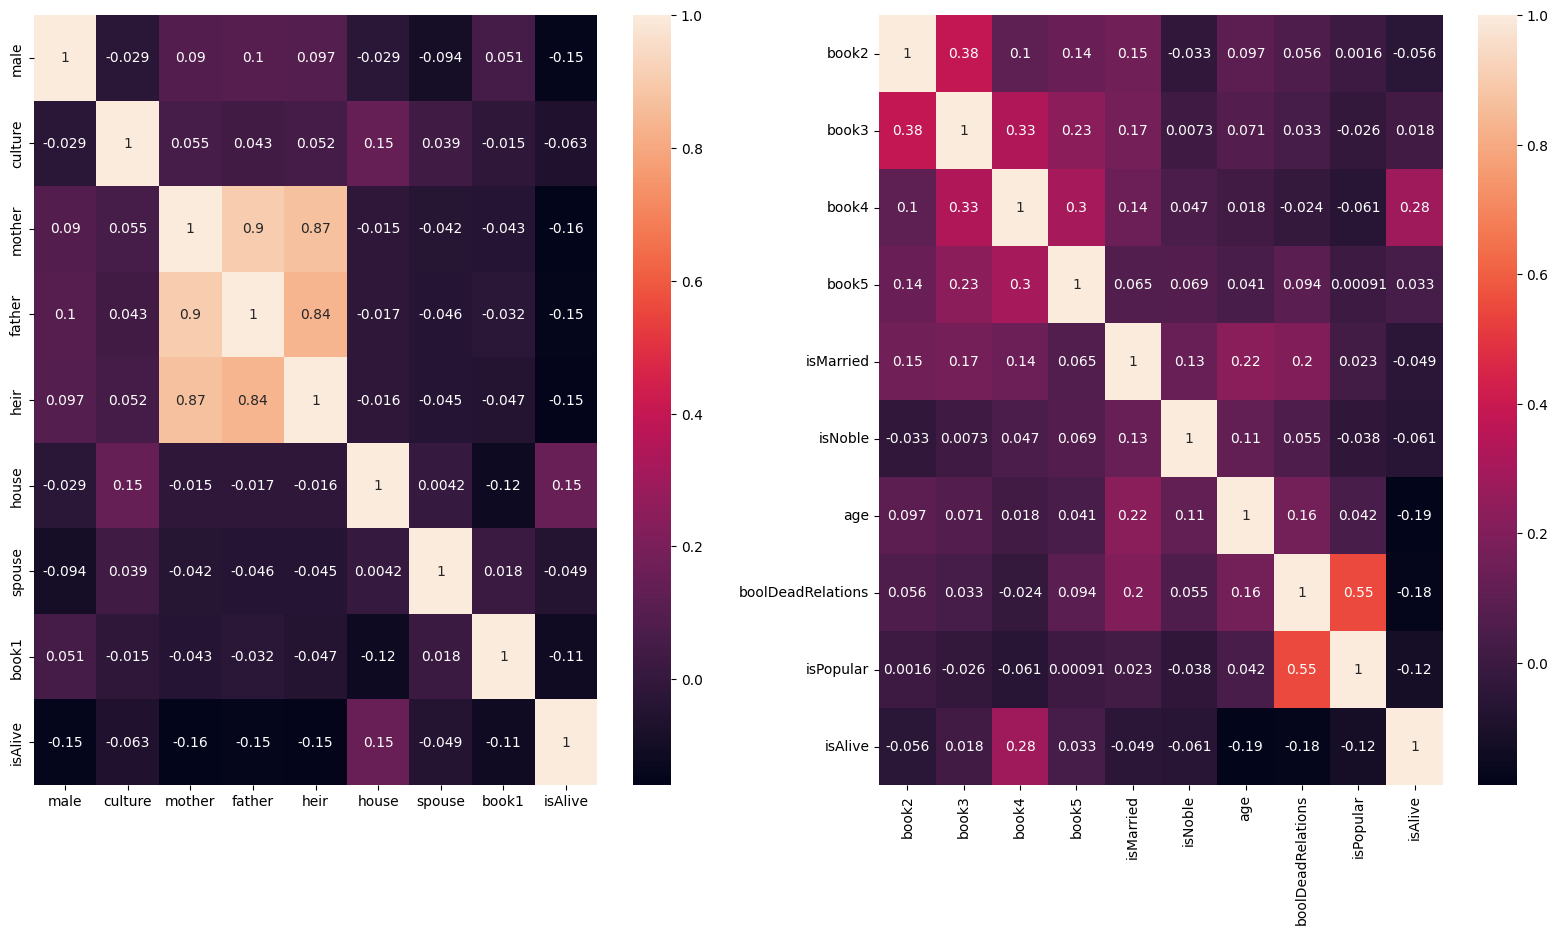

In [527]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sn.heatmap(data[["male", "culture", "mother", "father", "heir", "house", "spouse", "book1", "isAlive"]].corr(), annot = True)

plt.subplot(1, 2, 2)
sn.heatmap(data[["book2", "book3", "book4", "book5", "isMarried", "isNoble", "age", "boolDeadRelations", "isPopular", "isAlive"]].corr(), annot = True)

plt.show()

Удалим все призаки, модуль корреляции с целевым признаком которых меньше 0.1:

In [528]:
data.drop(columns=["culture", "spouse", "book2", "book3", "book5", "isMarried", "isNoble"], inplace=True)

Таким образом, обработка и признаков завершены, можно приступать к обучению моделей.

# Обучение и оценка моделей

## Нормализация данных

In [529]:
y = data["isAlive"].copy()
data.drop(columns=["isAlive"], inplace=True)

X = data.copy()

In [530]:
min_max_scl = MinMaxScaler()

X = min_max_scl.fit_transform(X)

## Разделение данных на train и test

In [531]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

## Логистическая регрессия

Обучение:

In [532]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

Качество на train и на test:

In [533]:
y_pred = logistic_regression.predict(X_test)

train_accuracy = accuracy_score(logistic_regression.predict(X_train), y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"train accuracy = {train_accuracy:.4f}, test accuracy = {test_accuracy:.4f}")

train accuracy = 0.8064, test accuracy = 0.7885


## Дерево решений

Подбор оптимальных параметров:

In [534]:
GDCV = GridSearchCV( DecisionTreeClassifier(),
                     param_grid=[ { 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                    'min_samples_split': [3, 5, 8, 13, 21],
                                    'min_samples_leaf': [3, 5, 8, 13, 21] } ],
                     cv=5,
                     scoring='accuracy' )
GDCV.fit(X_train, y_train)
GDCV.best_params_

{'max_depth': 8, 'min_samples_leaf': 13, 'min_samples_split': 3}

Обучение модели:

In [535]:
dtc = DecisionTreeClassifier(max_depth=8, min_samples_leaf=13, min_samples_split=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=13, min_samples_split=3)

Качество на train и на test:

In [536]:
y_pred = dtc.predict(X_test)

train_accuracy = accuracy_score(dtc.predict(X_train), y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"train accuracy = {train_accuracy:.4f}, test accuracy = {test_accuracy:.4f}")

train accuracy = 0.8265, test accuracy = 0.7917


## Случайный лес

Подбор оптимальных параметров:

In [537]:
GDCV = GridSearchCV( RandomForestClassifier(),
                     param_grid=[ { 'max_depth': [3, 5, 8, 13, 21],
                                    'min_samples_split': [3, 5, 8, 13],
                                    'min_samples_leaf': [3, 5, 8, 13],
                                    'max_features': [3, 5, 8, 13, 21, 55, 89],
                                    'n_estimators': [1, 25, 100] } ],
                     cv=2,
                     scoring='accuracy' )
GDCV.fit(X_train, y_train)
GDCV.best_params_

{'max_depth': 13,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 25}

Обучение модели:

In [538]:
rfc = RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=13, max_features=5, n_estimators=25)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=3,
                       min_samples_split=13, n_estimators=25)

Качество на train и на test:

In [539]:
y_pred = rfc.predict(X_test)

train_accuracy = accuracy_score(rfc.predict(X_train), y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"train accuracy = {train_accuracy:.4f}, test accuracy = {test_accuracy:.4f}")

train accuracy = 0.8321, test accuracy = 0.7788


## CatBoost

Обучение модели:

In [540]:
ctc = CatBoostClassifier()
ctc.fit(X_train, y_train)

Learning rate set to 0.011313
0:	learn: 0.6863646	total: 1.31ms	remaining: 1.31s
1:	learn: 0.6792120	total: 2.31ms	remaining: 1.15s
2:	learn: 0.6733999	total: 3.06ms	remaining: 1.01s
3:	learn: 0.6675435	total: 3.84ms	remaining: 956ms
4:	learn: 0.6617709	total: 4.8ms	remaining: 955ms
5:	learn: 0.6559769	total: 5.7ms	remaining: 945ms
6:	learn: 0.6514393	total: 6.62ms	remaining: 939ms
7:	learn: 0.6460288	total: 7.52ms	remaining: 932ms
8:	learn: 0.6405085	total: 8.43ms	remaining: 929ms
9:	learn: 0.6358894	total: 9.36ms	remaining: 927ms
10:	learn: 0.6299190	total: 10.3ms	remaining: 923ms
11:	learn: 0.6253833	total: 10.9ms	remaining: 899ms
12:	learn: 0.6216089	total: 12ms	remaining: 908ms
13:	learn: 0.6176242	total: 12.9ms	remaining: 906ms
14:	learn: 0.6136706	total: 13.8ms	remaining: 905ms
15:	learn: 0.6088156	total: 14.7ms	remaining: 904ms
16:	learn: 0.6061158	total: 15.2ms	remaining: 879ms
17:	learn: 0.6019192	total: 16.1ms	remaining: 879ms
18:	learn: 0.5973710	total: 17ms	remaining: 880m

Качество на train и на test:

In [541]:
y_pred = ctc.predict(X_test)

train_accuracy = accuracy_score(ctc.predict(X_train), y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"train accuracy = {train_accuracy:.4f}, test accuracy = {test_accuracy:.4f}")

train accuracy = 0.8498, test accuracy = 0.7917


# Подготовка тестовых данных и формирование ответов

## Подготовка тестовых данных

Далее повторим все те же действия, что и при подготовке тренировочных данных.

Загрузка тестовых данных

In [585]:
test_data = pd.read_csv("./game_of_thrones_test.csv", index_col="S.No")

Удаление ненужных столбцов:

In [586]:
test_data.drop(columns=["name", "dateOfBirth", "isAliveSpouse", "isAliveFather", "isAliveMother", "isAliveHeir", "isAliveFather", "title"], inplace=True)
test_data.drop(columns=["culture", "spouse", "book2", "book3", "book5", "isMarried", "isNoble"], inplace=True)

Обработка столбцов:

In [587]:
test_data["mother"] = test_data["mother"].apply(lambda x: 1 if type(x) == str else 0)

test_data["father"] = test_data["father"].apply(lambda x: 1 if type(x) == str else 0)

test_data["heir"] = test_data["heir"].apply(lambda x: 1 if type(x) == str else 0)

test_data["house"].fillna("does not belong", inplace=True)
test_data["house"] = test_data["house"].apply(lambda x: x if x in ["does not belong", "Night's Watch", "House Stark", "House Targaryen", "House Lannister", "House Greyjoy"] else "others houses")
test_data["house"] = label_encoding.fit_transform(test_data["house"])

test_data["age"] = test_data["age"].apply(lambda x: x // 10 * 10 if not(pd.isna(x)) else -1)

test_data["numDeadRelations"] = test_data["numDeadRelations"].apply(lambda x: 1 if x > 0 else 0)
test_data.rename(columns={"numDeadRelations": "boolDeadRelations"}, inplace=True)

test_data["popularity"] = test_data["popularity"].apply(lambda x: 1 if x > 0.5 else 0)
test_data.rename(columns={"popularity": "isPopular"}, inplace=True)

Нормализация данных:

In [588]:
min_max_scl = MinMaxScaler()

X = min_max_scl.fit_transform(test_data)

## Вычисление ответов и их сохранение

В ответ будем отправлять предсказания дерева решений.

Вычисление ответов:

In [604]:
y_pred = pd.Series(dtc.predict(X), name="isAlive")

Сохранение ответов:

In [605]:
pd.Series(y_pred).to_csv("./submission.csv", index=False)